In [32]:
# Setting Up the environment
import sys 
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install lxml html5lib yfinance pandas numpy plotly.express scikit-learn matplotlib statsmodels seaborn
import plotly.io as pio
pio.renderers.default = 'notebook'  


In [3]:
# Retrieving S&P 500 Constituents
# To begin the analysis, this section fetches the current list of S&P 500 companies 
# from Wikipedia using pandas.read_html,  which can directly extract tables from web pages
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

# Extract all 500 companies
top_500 = df[['Symbol', 'Security', 'GICS Sector']].iloc[:500]
top_500.columns = ['Ticker', 'Name', 'Sector']

# Preview it
top_500.head()

,Ticker,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [6]:
# Downloading Historical Price Data
# This section prepares and retrieves historical monthly 
# adjusted closing prices for all S&P 500 companies.

tickers = top_500['Ticker'].tolist()

# normalize tickers for Yahoo Finance
yf_tickers = [t.replace('.', '-') for t in top_500['Ticker'].tolist()]

# Download monthly adjusted close prices
price_data = yf.download(yf_tickers, start="2015-01-01", end="2024-12-31", interval='1mo')['Close']
price_data = price_data.dropna(how='any', axis=1)  # Drop tickers with NaNs
price_data.head()

[*********************100%***********************]  500 of 500 completed

56 Failed downloads:
['TSLA', 'OKE', 'CLX', 'NDAQ', 'GRMN', 'SCHW', 'BX', 'LLY', 'DVN', 'WSM', 'ESS', 'TRGP', 'SHW', 'ANET', 'PM', 'BA', 'MSI', 'MA', 'REGN', 'MGM', 'BDX', 'ELV']: Timeout('Failed to perform, curl: (28) Connection timed out after 10002 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['AMZN']: Timeout('Failed to perform, curl: (28) Connection timed out after 10000 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['RTX', 'JBL', 'DASH', 'JCI', 'ABBV', 'FRT', 'HAS', 'MS', 'FCX', 'HST', 'CSCO', 'ADBE', 'PSX', 'CB', 'VTR']: Timeout('Failed to perform, curl: (28) Connection timed out after 10001 milliseconds. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['OXY', 'PKG']: Timeout('Failed to perform, curl: (28) Connection timed out after 10003 milliseconds. See https://curl.se/libcurl/c/libcurl-e

Ticker,A,AAPL,ABT,ACGL,ADI,ADM,ADP,ADSK,AEE,AEP,...,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,34.625092,26.028074,36.630245,18.374529,42.118328,34.690235,66.052292,54.009998,33.097042,43.182579,...,23.071135,11.742269,47.096558,97.756615,23.942245,127.469490,27.174667,55.530621,29.946568,42.791851
2015-02-01,38.790138,28.538471,38.971390,18.751719,47.315434,35.620178,71.102455,64.239998,30.999229,39.586891,...,22.786081,11.962780,52.377068,107.735451,23.448038,122.773895,25.545486,56.242046,31.351706,48.292160
2015-03-01,38.183617,27.752274,38.115791,19.525116,51.264244,35.474773,68.541359,58.639999,30.845726,39.003529,...,22.329979,12.106592,57.631996,108.773979,22.323292,109.516869,25.205177,54.399788,30.876781,46.869167
2015-04-01,38.111828,27.912857,38.189827,19.233509,50.320335,36.582420,68.052589,56.830002,30.227394,39.433418,...,21.316999,11.767472,50.998711,110.502846,21.218912,96.632019,24.783716,55.916588,32.640163,51.179802
2015-05-01,37.946018,29.057028,40.187878,20.250969,55.300285,39.553623,68.833397,54.150002,29.703169,39.031269,...,20.284597,11.769875,51.924652,107.844208,21.925985,87.601303,24.886038,54.527782,32.243401,53.933125


In [7]:
# Calculating Monthly Returns
returns = price_data.pct_change().dropna()
returns.head()


Ticker,A,AAPL,ABT,ACGL,ADI,ADM,ADP,ADSK,AEE,AEP,...,WMT,WRB,WST,WTW,WY,WYNN,XEL,XOM,XYL,YUM
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-01,0.120290,0.096450,0.063913,0.020528,0.123393,0.026807,0.076457,0.189409,-0.063384,-0.083267,...,-0.012355,0.018779,0.112121,0.102078,-0.020642,-0.036837,-0.059952,0.012811,0.046922,0.128536
2015-03-01,-0.015636,-0.027549,-0.021955,0.041244,0.083457,-0.004082,-0.036020,-0.087173,-0.004952,-0.014736,...,-0.020017,0.012022,0.100329,0.009640,-0.047968,-0.107979,-0.013322,-0.032756,-0.015148,-0.029466
2015-04-01,-0.001880,0.005786,0.001942,-0.014935,-0.018413,0.031224,-0.007131,-0.030866,-0.020046,0.011022,...,-0.045364,-0.028011,-0.115097,0.015894,-0.049472,-0.117652,-0.016721,0.027882,0.057110,0.091972
2015-05-01,-0.004351,0.040991,0.052319,0.052900,0.098965,0.081219,0.011474,-0.047158,-0.017343,-0.010198,...,-0.048431,0.000204,0.018156,-0.024059,0.033323,-0.093455,0.004129,-0.024837,-0.012156,0.053797
2015-06-01,-0.063365,-0.033206,0.009877,0.048051,-0.049788,-0.082772,-0.061746,-0.075162,-0.063386,-0.049973,...,-0.038944,0.059796,0.072775,-0.011799,-0.032555,-0.015733,-0.054919,-0.015397,0.017551,-0.000333


In [8]:
# Importing Fama-French Factor Data
# To enrich the analysis with well-established asset pricing factors, 
# this section imports the Fama-French 5-Factor dataset. 
# The data, sourced from a CSV file, includes monthly factor returns such as market excess return, 
# size, value, profitability, and investment.

# Load monthly data only
# ff = pd.read_csv("/Users/antonio/Desktop/F-F_Research_Data_5_Factors_2x3.csv", skiprows=3, nrows=738)
url = "https://raw.githubusercontent.com/antonio-ash/stock-clustering-project/refs/heads/main/F-F_Research_Data_5_Factors_2x3.csv"
ff = pd.read_csv(url)

# Rename column
ff.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Filter only rows where Date matches 'YYYYMM'
ff = ff[ff['Date'].astype(str).str.match(r'^\d{6}$')]

# Convert to datetime
ff['Date'] = pd.to_datetime(ff['Date'], format='%Y%m')
ff.set_index('Date', inplace=True)

# Convert rest to numeric and scale to decimal format
ff = ff.apply(pd.to_numeric, errors='coerce') / 100

# Preview
ff.head()


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1963-08-01,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
1963-09-01,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
1963-10-01,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
1963-11-01,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027


In [11]:
# Estimating Fama-French 5-Factor Betas for Each Stock
# This section estimates the sensitivity (beta coefficients) of each S&P 500 stock to the five Fama-French factors using linear regression. 
# For each ticker, the script calculates the stock’s monthly excess return (i.e., return minus the risk-free rate). 
# It then regresses this excess return against the five factors: market excess return (Mkt-RF), 
# size (SMB), value (HML), profitability (RMW), and investment (CMA). 
# Using statsmodels.OLS, it fits a separate regression model per stock and stores the resulting factor
# loadings (excluding the intercept). The compiled betas are then combined into a single DataFrame
# and merged with sector information for later analysis by industry. 
# This step effectively quantifies how each stock’s return behavior can be explained 
# by common risk factors in modern asset pricing theory.

betas = {}

for ticker in returns.columns:
    df = pd.DataFrame()
    df['excess_ret'] = returns[ticker] - (ff['RF'])
    X = ff[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    X = sm.add_constant(X)
    y = df['excess_ret'].loc[X.index]
    
    model = sm.OLS(y, X, missing='drop').fit()
    betas[ticker] = model.params.drop('const')

beta_df = pd.DataFrame(betas).T.dropna()

beta_df = beta_df.merge(top_500[['Ticker', 'Sector']], left_index=True, right_on='Ticker')

beta_df.head()


,Mkt-RF,SMB,HML,RMW,CMA,Ticker,Sector
9,1.172263,-0.073998,-0.051510,-0.179664,0.201809,A,Health Care
39,1.179139,-0.005582,-0.558986,0.590781,-0.042528,AAPL,Information Technology
2,0.937961,-0.023654,-0.635089,-0.013606,0.991921,ABT,Health Care
42,0.568727,-0.313383,0.692092,0.481150,-0.415140,ACGL,Financials
34,0.980159,0.502687,0.185326,0.368850,-0.327477,ADI,Information Technology


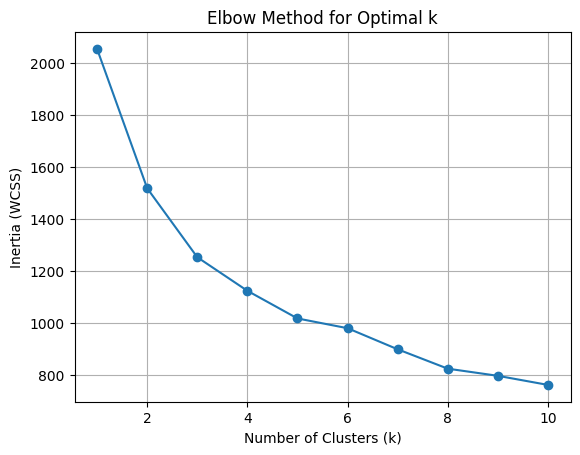

In [23]:
# Determining the Optimal Number of Clusters (Elbow Method)
# To explore whether stocks can be meaningfully grouped based on their Fama-French factor exposures,
# this section applies K-Means clustering to the beta coefficients. 
# Before running the clustering algorithm, the beta values are assumed to have been standardized 
# (via scaled_betas). The code evaluates cluster counts from 1 to 10, storing the inertia 
# (within-cluster sum of squares) for each k. Plotting these values reveals the "elbow point" — 
# the value of k at which adding more clusters yields diminishing returns in variance reduction. 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
beta_columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
scaled_betas = scaler.fit_transform(beta_df[beta_columns])
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_betas)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [24]:
# Clustering Stocks Based on Factor Exposures
# After determining a suitable number of clusters, this section implements K-Means clustering 
# to group stocks according to their Fama-French factor betas. 
# First, the selected beta columns are standardized using StandardScaler to ensure that 
# all factors contribute equally to the distance calculations. 
# K-Means is then applied with k=4 clusters (as determined earlier), 
# and each stock is assigned to a cluster based on its factor profile.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

beta_columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
scaled_betas = scaler.fit_transform(beta_df[beta_columns])

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_betas)

beta_df['Cluster'] = clusters
beta_df.head()


,Mkt-RF,SMB,HML,RMW,CMA,Ticker,Sector,Cluster
9,1.172263,-0.073998,-0.051510,-0.179664,0.201809,A,Health Care,1
39,1.179139,-0.005582,-0.558986,0.590781,-0.042528,AAPL,Information Technology,0
2,0.937961,-0.023654,-0.635089,-0.013606,0.991921,ABT,Health Care,3
42,0.568727,-0.313383,0.692092,0.481150,-0.415140,ACGL,Financials,1
34,0.980159,0.502687,0.185326,0.368850,-0.327477,ADI,Information Technology,0


In [34]:
# Interpreting and Visualizing Stock Clusters
# This section summarizes and visualizes the clusters formed based on factor exposures. 
# Each cluster's average Fama-French betas are computed to capture its typical risk profile, 
# and the most common sectors within each group are identified to add economic context. 
# These details are merged into a single dataset alongside custom labels 
# and manually assigned plot coordinates for clarity. 
# The resulting bubble chart offers an intuitive view of the clusters, 
# showing how stocks group by risk factors and sector tendencies, 
# and helping to interpret the strategic traits of each cluster.

beta_columns = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
cluster_profiles = beta_df.groupby('Cluster')[beta_columns].mean().round(2).reset_index()

cluster_sizes = beta_df.groupby('Cluster').size().rename('Size').reset_index()

sector_counts = beta_df.groupby(['Cluster', 'Sector']).size().reset_index(name='Count')

def build_top_3_label(group):
    top_sectors = group.sort_values('Count', ascending=False).head(3)
    return "<br>".join([f"{row['Sector']} ({row['Count']})" for _, row in top_sectors.iterrows()])

bubble_labels = (
    sector_counts.groupby('Cluster')[['Sector', 'Count']]
    .apply(build_top_3_label)
    .reset_index(name='Label')
)

bubble_df = cluster_sizes.merge(bubble_labels, on='Cluster')
bubble_df = bubble_df.merge(cluster_profiles, on='Cluster')

cluster_labels = {
    0: "Diversified Core Exposure",
    1: "Defensive & Quality-Oriented",
    2: "Cyclical Growth & Innovation",
    3: "High-Risk Value & Turnaround"
}

bubble_df = bubble_df.copy()

position_map = {
    0: (-1, -1),
    1: (-0.3, -0.3),
    2: (0.35, 0.35),
    3: (1,1)
}

bubble_df['x'] = bubble_df['Cluster'].map(lambda c: position_map[c][0])
bubble_df['y'] = bubble_df['Cluster'].map(lambda c: position_map[c][1])


bubble_df['Interpretation'] = bubble_df['Cluster'].map(cluster_labels)
bubble_df['DisplayLabel'] = bubble_df['Interpretation'] + "<br>" + bubble_df['Label'].str.replace("<br>", ", ")

fig = px.scatter(
    bubble_df,
    x='x',
    y='y',
    size='Size',
    color='Cluster',
    text='Interpretation',
    hover_data={
        'Mkt-RF': True,
        'SMB': True,
        'HML': True,
        'RMW': True,
        'CMA': True,
        'Label': True,
        'x': False,
        'y': False
    },
    size_max=155,
)

fig.update_traces(
    textfont=dict(color='black'),
    textposition='middle center',
    marker=dict(line=dict(width=2, color='DarkSlateGrey'))
)

fig.update_layout(
    title="Stock Clusters by Sector Composition and Factor Profiles",
    showlegend=False,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    height=600
)

fig.show()

